<a href="https://colab.research.google.com/github/r1marcus/TraintheTrainer-Daten/blob/main/04_data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Der Datensatz
Dieses Notebook soll einen Überblick über verschiedene Möglichkeiten der Datenvisualisierung geben und zeigen welche Erkenntnisse sich dadurch gewinnen lassen. <br>

Wir verwenden dafür den `supermarket_sales.csv` Datensatz, welcher auf <br>

https://www.kaggle.com/aungpyaeap/supermarket-sales <br> 

heruntergeladen werden kann. Über einen Zeitraum von drei Monaten wurden in drei Branchen Informationen über die Einkäufe in Supermärkten gesammelt. Jeder der insgesamt 1000 Einkäufe erhält eine generierte Identifikationsnummer (`Invoice id`) sowie die Folgenden Informationen: <br>

$\cdot$ `branch` Branche des Einkaufs mit den Werten "A", "B" oder "C" an.<br>
$\cdot$ `City` Eine der Städte "Yangon", "Mandalay" oder "Naypyitaw".<br>
$\cdot$ `Customer type` Gibt an ob eine Mitgliedskarte vorhaben war (mit den Werten "Member" (mit Karte) oder "Normal" (ohne Karte)).<br>
$\cdot$ `Gender` Geschlecht des Kunden mit Werten "Male" oder "Female". <br>
$\cdot$ `Product line` Produktkategorien, wie etwa "Electronic accessories", "Fashion accessories", ect. <br>
$\cdot$ `Unit price` Preis für Einzelprodukt in $\$$. <br>
$\cdot$ `Quantity` Anzahl der gekauften Produkte.<br>
$\cdot$ `Tax 5%` Steuern in $\$$. <br>
$\cdot$ `Total` Gesamtpreis. <br>
$\cdot$ `Date` Datum (von Januar bis März 2019). <br>
$\cdot$ `Time` Uhrzeit (10:00 Uhr bis 21:00 Uhr). <br>
$\cdot$ `Payment` Zahlungsmethode ("Cash (Bar), "Credit" (Kreditkarte) oder "Ewallet". <br>
$\cdot$ `cogs` Kosten der verkauften Waren. <br>
$\cdot$ `gross margin percentage` Bruttogewinnmarge in %. <br>
$\cdot$ `gross income` Bruttoertrag. <br>
$\cdot$ `rating` Kundenzufriedenheit des Einkaufes von 1-10. <br>

Wir beginnen mit dem Impotieren der Daten. Laden Sie sich die CSV Datei unter dem obigen Link herunter. In der folgenden Zelle werden Sie darauf hingewiesen die Datei hochzuladen, sodass die als Pandas DataFrame vorliegt.






In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['supermarket_sales - Sheet1.csv']))

Saving supermarket_sales - Sheet1.csv to supermarket_sales - Sheet1.csv


Werfen wir einen Blick in die Daten. 

In [ ]:
data.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


Es ist sinnvoll zu überprüfen ob Daten fehlen.

In [ ]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Sehr gut, die Daten sind vollständig! Bevor wir zu der Visualisierung kommen, sollten wir uns einige allgemeine statistische Informationen ansehen um ein besseres Bild von dem Datensatz zu bekommen. 

In [ ]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# Bewertungen und Zusammenhänge

Verteilungen können häufig gut mit Histogrammen dargestellt werden. Sehen wir uns die Kundenbewertungen an. Der Parameter `bins` kann verändert werden um genauere oder gröbere Resultate zu erhalten. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

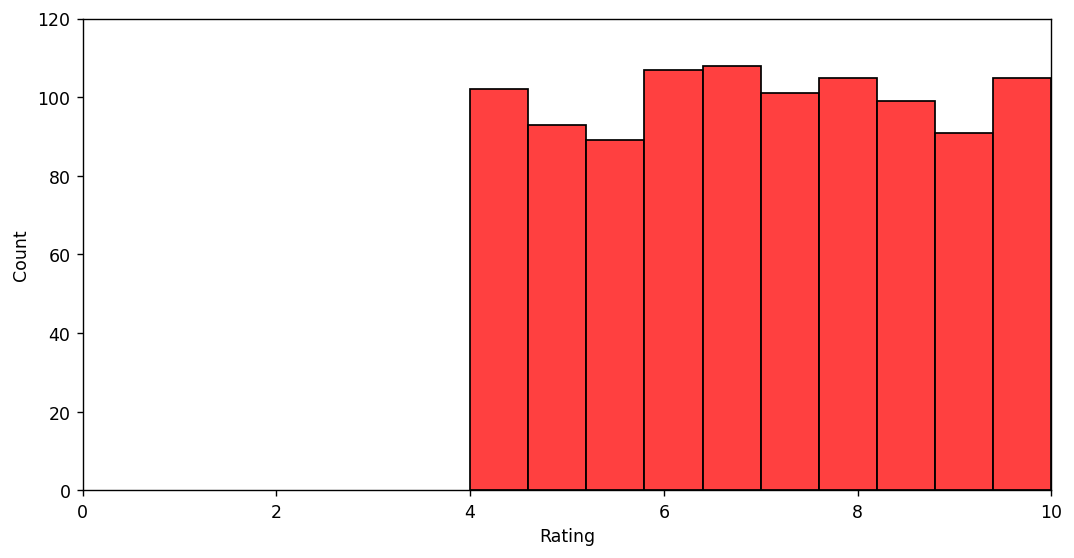

In [ ]:
plt.figure(figsize= (10,5), dpi = 125)
sns.histplot(data["Rating"], bins = 10, kde=False, color="red")
plt.axis([0,10,0,120])
plt.show()

In [ ]:
#Gibt die durchschnittliche Kundenbewertung an
np.round(data["Rating"].mean(),1)

7.0

Wir sehen, dass es keine Bewertungen gibt, welche schlechter als vier ist und dass die Werte darüber einer Gleichverteilung ähneln. Wichtige Zusammenhänge können wir mithilfe der `corr()` Methode berechnen lassen und dann als "Headtmap" visualisieren (plotten). 

In [ ]:
data.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000e+00,1.077756e-02,6.339621e-01,6.339621e-01,6.339621e-01,-6.998957e-16,6.339621e-01,-8.777507e-03
Quantity,1.077756e-02,1.000000e+00,7.055102e-01,7.055102e-01,7.055102e-01,-3.849075e-16,7.055102e-01,-1.581490e-02
Tax 5%,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Total,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.408632e-16,1.000000e+00,-3.644170e-02
cogs,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.439279e-15,1.000000e+00,-3.644170e-02
gross margin percentage,-6.998957e-16,-3.849075e-16,2.461896e-16,2.408632e-16,1.439279e-15,1.000000e+00,2.461896e-16,2.042714e-15
gross income,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Rating,-8.777507e-03,-1.581490e-02,-3.644170e-02,-3.644170e-02,-3.644170e-02,2.042714e-15,-3.644170e-02,1.000000e+00


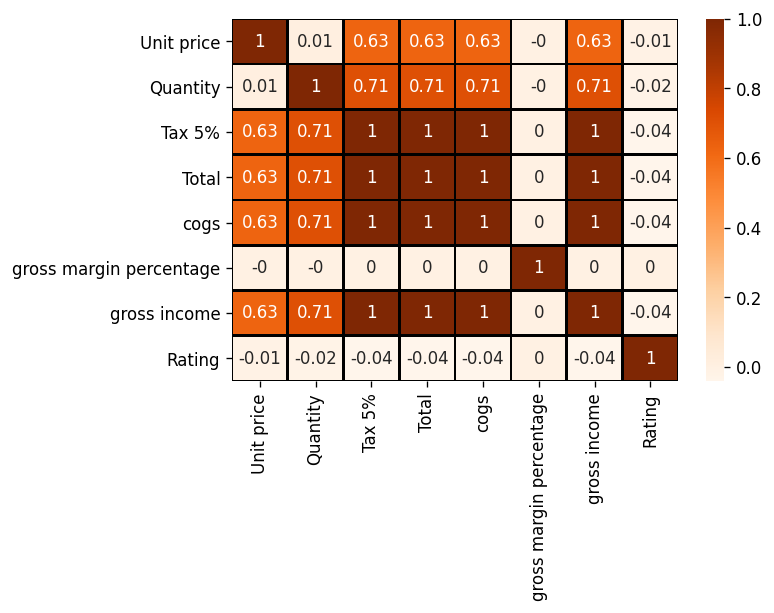

In [ ]:
plt.figure(dpi=120)
sns.heatmap(np.round(data.corr(), 2), annot=True, cmap = "Oranges", linewidths = 1, linecolor = "black")
plt.show()

Wir sehen hier, wie zu erwarten, die offensichtlichen Zusammenhänge von etwa von Steuern und Gesamtpreis mit Korrelation 1 aber auch etwa Gesamtpreis und Anzahl der gekauften Produkte mit Korrelation 0.71. Mit einem `regplot`können wir Verteilungskorrelationen noch besser visualisieren. 

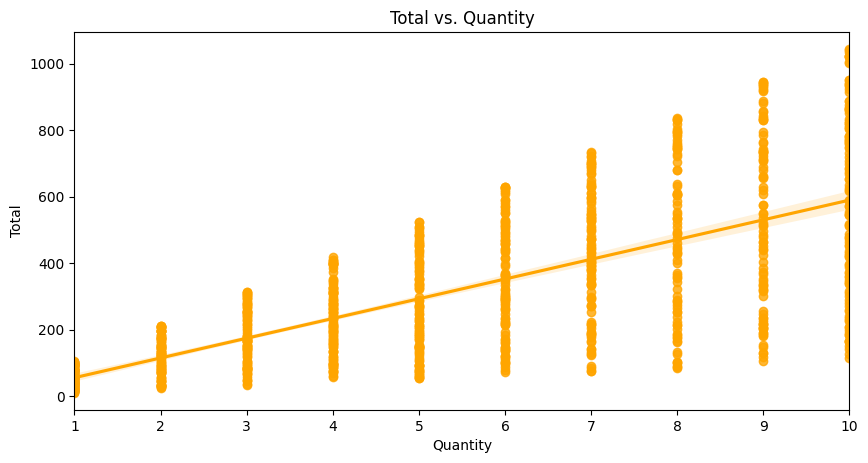

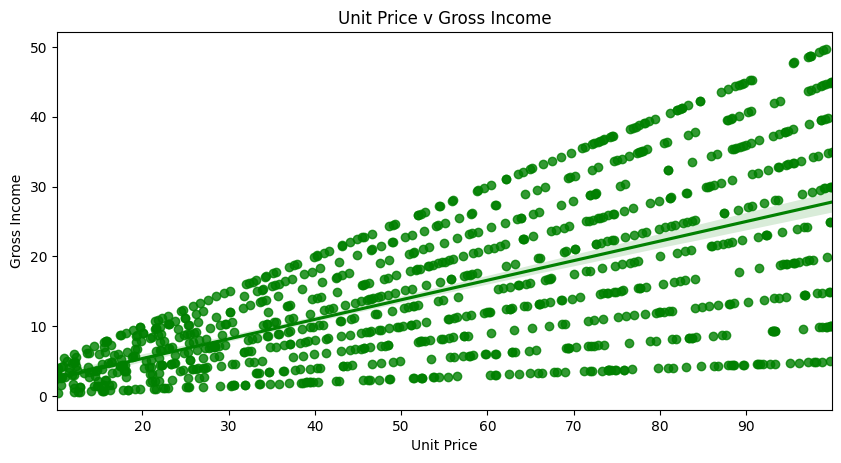

In [ ]:
plt.figure(figsize = (10,5), dpi = 100)
sns.regplot(x = "Quantity", y = "Total",data = data, color ="orange")
plt.xlabel("Quantity")
plt.ylabel("Total")
plt.title("Total vs. Quantity")
plt.show()
plt.figure(figsize=(10,5),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=data,color='green')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price vs. Gross Income')
plt.show()

Wir sehen wie sich der Gesamtpreis in Abhängigkeit von der Anzahl der gekauften Produkte verhält. Die Varianz wird immer größer, wobei der minimale Preis fast konstant bleibt. Wir sehen außerdem wie der Bruttoertrag mit dem Einzelpreis in diskreten Bahnen steigt. <br> 



# Analyse der Käufergruppen

Analysieren wir im Folgenden die Käufergruppen mit dem Tool `plotly`. 

In [ ]:
#Importe
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots

In [ ]:
# Funktion die Prozente liefert
def percentage(x):
  result = x.apply(lambda y : round(y/x[:].sum()*100,2))
  result = result.apply(lambda y: str(y)+"%")
  return result

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = data["Gender"].value_counts().index, 
    y = data["Gender"].value_counts(), 
    text = [f'{percentage(data["Gender"].value_counts())[0]}', f'{percentage(data["Gender"].value_counts())[1]}'],
    ))
fig.update_traces(textposition = "inside")

fig.update_layout(
    xaxis_title = "Geschlecht",
    yaxis_title = "Anzahl",
    title = "Anteil von Männern und Frauen",
    height = 500,
)

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = data["Customer type"].value_counts().index, 
    y = data["Customer type"].value_counts(), 
    text = [f'{percentage(data["Customer type"].value_counts())[0]}', f'{percentage(data["Customer type"].value_counts())[1]}']

    ))
fig.update_traces(textposition = "outside")

fig.update_layout(
    xaxis_title = "Member",
    yaxis_title = "Count",
    title = "Anteil von Mitgliedern und Nicht-Mitgliedern",
    height = 500
)

Sowohl die Geschlechter als auch Mitglieder im Vergleich zu Nicht-Mitgliedern sind relativ ausgeglichen verteilt. Überprüfen wir wie diese Eigenschaften zusammenhängen. 

In [ ]:
#Erstelle gruppierten DataFrame
grouped_gender_customer = data.groupby(["Gender", "Customer type"]).size()

In [ ]:
#Extrahiere Kategorien
male_normal = grouped_gender_customer.loc["Male", "Normal"]
female_normal = grouped_gender_customer.loc["Female", "Normal"]
male_member = grouped_gender_customer.loc["Male", "Member"]
female_member = grouped_gender_customer.loc["Female", "Member"]

member = male_member + female_member
non_member = male_normal + female_normal

In [ ]:
#Berechne prozentuale Anteile
normal_percentage_male = str(round(male_normal / member * 100, 2)) + "%"
normal_percentage_female = str(round(female_normal / member * 100, 2)) + "%"

member_percentage_male = str(round(male_member / member*100, 2)) + "%"
member_percentage_female = str(round(female_member / member*100, 2)) + "%"

In [ ]:
#Erstelle die Grafik
fig = make_subplots(
    rows = 1, cols = 2,
    column_widths = [1, 1],
    specs = [[{'type' : 'bar'},{'type' : 'bar'}]]
)

fig.add_trace(go.Bar(
    x = ["Male", "Female"],
    y = [male_member, female_member],
    name = "Member",
    text = [member_percentage_male, member_percentage_female],
), row = 1, col = 1)

fig.add_trace(go.Bar(
    x = ["Male", "Female"],
    y = [male_normal, female_normal],
    name = "Non-member",
    text = [normal_percentage_male, normal_percentage_female],

), row = 1, col = 2)

fig.update_traces(
    textposition = 'inside'
)

fig.update_layout(
    title = "Wer hat hat eine Mitgliedskarte?",
    yaxis_title = "Anzahl",
    xaxis_title = "Geschlecht",
    height  = 500,
)

fig.show()

Interessant! Die Mitglieder sind zu 52.1 % weiblich und zu 47.9 % Männlich. <br>

# Zeitanalyse

Wir möchten nun mehr über Kaufverhalten in zeitlicher Abhängigkeit erfahren.

In [ ]:
#Kombiniere Datum und Uhrzeit zu neuer Spalte
data["datetime"] = data["Date"] + " " + data["Time"]

#Konvertiere zu Pandas Datetime Objekt
data["datetime"] = pd.to_datetime(data["datetime"])

In [ ]:
#Erstelle Dataframe mit spezielleren Infos über das Datum und einigen anderen Infos, die wir später brauchen
datetime_frame = pd.concat([data['datetime'], data["datetime"].dt.month.to_frame(name="month"),data["datetime"].dt.day.to_frame(name= "day"), data["datetime"].dt.hour.to_frame(name ="hour"), data["City"], data["Branch"], data["Rating"], data["Product line"]], axis = 1)
#Tag 0 entspricht Montag - Tag 6 entspricht Sonntag
datetime_frame["day"] = (datetime_frame["day"]) % 7
datetime_frame = datetime_frame.rename(columns= {"Product line": "product_line"})

In [ ]:
datetime_frame.head()

,datetime,month,day,hour,City,Branch,Rating,product_line
0,2019-01-05 13:08:00,1,5,13,Yangon,A,9.1,Health and beauty
1,2019-03-08 10:29:00,3,1,10,Naypyitaw,C,9.6,Electronic accessories
2,2019-03-03 13:23:00,3,3,13,Yangon,A,7.4,Home and lifestyle
3,2019-01-27 20:33:00,1,6,20,Yangon,A,8.4,Health and beauty
4,2019-02-08 10:37:00,2,1,10,Yangon,A,5.3,Sports and travel


In [ ]:
#Wir sehen uns die Abhängigkeiten von Stadt-Stunde und Branche-tag an
city_hours = datetime_frame.groupby(by =["City", "hour"]).size()
branch_day = datetime_frame.groupby(by =["Branch", "day"], sort = True).size()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = city_hours["Yangon"].index,
    y = city_hours["Yangon"].values,
    name = "Yangon",
    fill = "tozeroy",
    mode = "none",
    fillcolor = 'rgba(50,90,10,0.4)'
))

fig.add_trace(go.Scatter(
    x = city_hours["Naypyitaw"].index,
    y = city_hours["Naypyitaw"].values,
    name = "Naypyitaw",
    fill = "tozeroy",
    mode = "none",
    fillcolor = 'rgba(10,50,90,0.4)'
))

fig.add_trace(go.Scatter(
    x = city_hours["Mandalay"].index,
    y = city_hours["Mandalay"].values,
    name = "Mandalay",
    fill = "tozeroy",
    mode = "none",
    fillcolor = 'rgba(90,10,50,0.4)'
))

fig.update_layout(
    xaxis_title = 'Hour (24:00 Format)',
    yaxis_title = 'Frequency',
    title = 'Zu welcher Zeit wird am meisten gekauft?',
)

fig.update_xaxes(
    nticks = 20
)

fig.show()

In Mandalay wird gegen Abends vermehrt eingekauft. Wir können eine ähnliche Graphik für die Wochentage und Branchen erstellen. 

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    y = branch_day["A"].values,
    name = "A",
    fill = "tozeroy",
    mode = "none",
    fillcolor = 'rgba(50,90,10,0.4)'
))

fig.add_trace(go.Scatter(
    x = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    y = branch_day["B"].values,
    name = "B",
    fill = "tozeroy",
    mode = "none",
    fillcolor = 'rgba(10,50,90,0.4)'
))

fig.add_trace(go.Scatter(
    x = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    y = branch_day["C"].values,
    name = "C",
    fill = "tozeroy",
    mode = "none",
    fillcolor = 'rgba(90,10,50,0.4)'
))

fig.update_layout(
    xaxis_title = 'Wochentag',
    yaxis_title = 'Frequency',
    title = 'An welchem Tag wird am meisten gekauft?',
)

fig.update_xaxes(
    nticks = 20
)

fig.show()

Freitags sind die Branchen B und C am wenigsten beliebt. Uns interesiert, ob an bestimmten Tagen im Monat mehr oder weniger eingekauft wird. Hierfür eignet sich wieder ein Histogramm. 

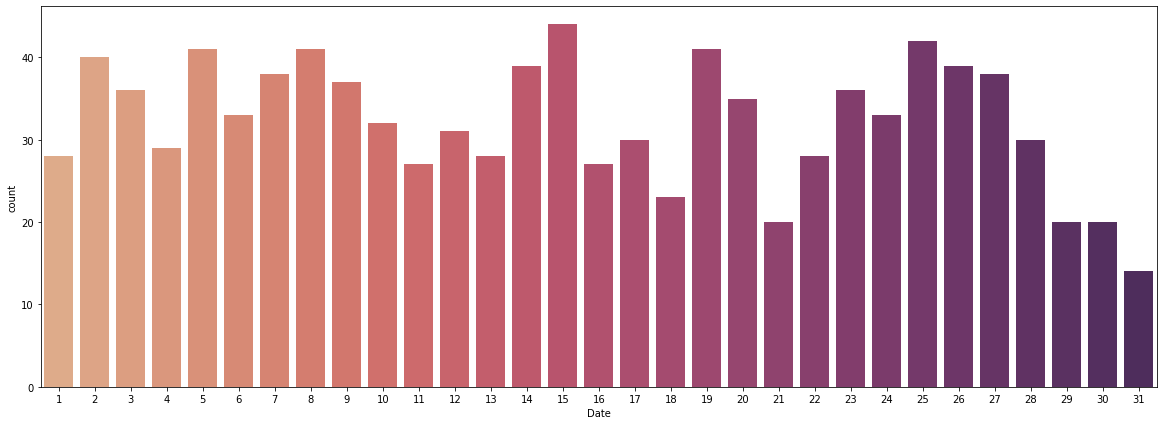

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(data = pd.DataFrame(pd.to_datetime(data["Date"]).dt.day), x= "Date", palette = "flare")
plt.show()

Schließlich wäre möchten wir noch wissen wie sich die Kundenzufriedenheit in Abhängigkeit zur Uhrzeit verhält. 

In [ ]:
import plotly.express as px

fig = go.Figure()

fig.add_trace(go.Histogram2dContour(
    y = datetime_frame.Rating,
    x = datetime_frame.hour,
    colorscale= 'teal',
))

fig.update_layout(
    height = 700,
    width = 700,
    title = 'Bewertung in Abhängigkeit der Uhrzeit',
    xaxis_title = 'Tageszeit',
    yaxis_title = 'Bewertung'
)

Die meisten Bewertungen werden etwa um 12:00 Uhr und um 18:00 Uhr getätigt. Wir können noch genauer werden und eine Abhängigkeit von der Produktlinie analysieren.

In [ ]:
fig = make_subplots(rows = 1, cols = 6, specs = [[{'type': 'xy'}, {'type' : 'xy'}, {'type': 'xy'},  {'type': 'xy'},  {'type': 'xy'},  {'type': 'xy'}]],
                   subplot_titles = ('Health and beauty', 'Electronic accessories', 'Home and lifestyle', "Sports and travel", "Food and beverages", "Fashion accessories"))

fig.add_trace(go.Histogram2dContour(
    y = datetime_frame.query('product_line == "Health and beauty"').Rating,
    x = datetime_frame.query('product_line == "Health and beauty"').hour,
    colorscale= 'teal',
), row = 1, col = 1)

fig.add_trace(go.Histogram2dContour(
    y = datetime_frame.query('product_line == "Electronic accessories"').Rating,
    x = datetime_frame.query('product_line == "Electronic accessories"').hour,
    colorscale= 'teal'
), row = 1, col = 2)

fig.add_trace(go.Histogram2dContour(
    y = datetime_frame.query('product_line == "Home and lifestyle"').Rating,
    x = datetime_frame.query('product_line == "Home and lifestyle"').hour,
    colorscale= 'teal'
), row = 1, col = 3)

fig.add_trace(go.Histogram2dContour(
    y = datetime_frame.query('product_line == "Sports and travel"').Rating,
    x = datetime_frame.query('product_line == "Sports and travel"').hour,
    colorscale= 'teal'
), row = 1, col = 4)

fig.add_trace(go.Histogram2dContour(
    y = datetime_frame.query('product_line == "Food and beverages"').Rating,
    x = datetime_frame.query('product_line == "Food and beverages"').hour,
    colorscale= 'teal'
), row = 1, col = 5)

fig.add_trace(go.Histogram2dContour(
    y = datetime_frame.query('product_line == "Fashion accessories"').Rating,
    x = datetime_frame.query('product_line == "Fashion accessories"').hour,
    colorscale= 'teal'
), row = 1, col = 6)

fig.update_layout(
    height = 500,
    width = 2500,
    title = 'Bewertung in Abhängigkeit der Uhrzeit',
    xaxis_title = 'Tageszeit',
    yaxis_title = 'Bewertung'
)

Es scheint als würden in der Kategorie "Food and beverages" überdurchschnittlich viele gute Bewertungen getätigt, während im Bereich "Sport and travel", vor allem Vormittags, mehr unterdurchschnittliche Bewertungen zu sehen sind. Wir werden im Folgenden noch mehr über diese Kategorien herausfinden. 

# Kategorien

In [ ]:
# DataFrame vorbereiten (Leerzeichen sind verboten)
product_total = data[['Product line',"Total"]].rename(columns={"Product line": "product_line", "Total": "total"})

In [ ]:
# Queries für Produktlinien
hb = product_total.query('product_line == "Health and beauty"')
ea = product_total.query('product_line == "Electronic accessories"')
hl = product_total.query('product_line == "Home and lifestyle"')
st = product_total.query('product_line == "Sports and travel"')
fb = product_total.query('product_line == "Food and beverages"')
fa = product_total.query('product_line == "Fashion accessories"')

# Liste zum Interieren
product_line_box = [hb, ea, hl, st, fb, fa]

In [ ]:
fig = go.Figure()
N = 6
blue_shades =[
    '#004FD6',
    '#005DFC',
    '#0058F0',
    '#002970',
    '#0041B0',
    '#003C61'
]
i = 0
for x in product_line_box:
    fig.add_trace(go.Box(
        y = x.total,
        name = str(x['product_line'].unique()).strip("[]'"),
        boxmean = True,
        boxpoints = 'all',
        jitter = 0.4,
        pointpos = -2,
        fillcolor = blue_shades[i]
    ))
    i+=1

fig.update_traces(
    marker = dict(color = 'black')
)
fig.update_layout(
    title = 'Gesamtausgaben nach Kategorien',
    yaxis_title = 'Gesamtpreis',
    xaxis = dict(),
    height = 600
)

fig.show()

In dieser Graphik sehen Sie zu jeder Kategorie alle Einkäufe als Punkte auf der linken Seite. Der "Box-Plot" zeigt das obere und untere Quantil als  Grenzen an und den Median in der Mitte. <br>